# Estatística Frequências e Medidas - Desafio Final


In [ ]:
#importação das bibliotecas para análise dos dados

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat

In [ ]:
#instalação do pydataset

!pip install pydataset --quiet
from pydataset import data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
initiated datasets repo at: /root/.pydataset/


In [ ]:
#leitura do arquivo no formato json
dataframe = pd.read_json('enem_2023.json')

In [ ]:
#análise do arquivo com as 10 primeiras linhas
dataframe.head(10)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
5,616.043360,502.007005,497.777935,615.902547,507.365147,Homem
6,511.897593,479.197660,469.023899,441.139103,541.979136,Mulher
7,377.439818,663.489624,556.239031,517.215575,635.424649,Mulher
8,597.462934,NaN,483.223740,509.043317,499.676936,Mulher
9,536.571398,594.007869,NaN,595.562778,270.839965,Mulher


1. Qual das disciplinas tem a maior amplitude de nota?


In [ ]:
#identificação inicial de estatísticas sobre os dados.
dataframe.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
#função para calcular e localizar a amplitude e a variancia das categorias.
def amplitude_disc(df):
  df1 = df.describe()
  df1.loc["amplitude"] = df1.loc['max'] - df1.loc['min']
  df1.loc["variancia"] = df1.loc['std'] * df1.loc['std']
  return df1

In [ ]:
#chamada da função a cima + print
aux = amplitude_disc(dataframe)
print(aux)
i = aux.loc['amplitude'].max()
print(f'A maior amplitude é: ', i)

            Linguagens  Ciências humanas  Ciências da natureza   Matemática       Redação
count       897.000000        936.000000            824.000000   924.000000    860.000000
mean        514.524809        527.042281            499.315583   535.965660    637.783532
std          84.009313         77.811519             78.760404    86.648100    115.339972
min         287.000000        289.900000            314.400000   319.800000    270.839965
25%         458.360558        475.424546            444.709076   479.172971    556.468366
50%         515.045250        524.519920            500.479263   533.247767    635.273973
75%         571.635876        581.401952            548.751678   592.912963    715.989868
max         804.456317        763.919695            802.004568   807.877902   1000.000000
amplitude   517.456317        474.019695            487.604568   488.077902    729.160035
variancia  7057.564698       6054.632515           6203.201190  7507.893239  13303.309244
A maior am

2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se
de remover todos os valores nulos quando considerar a mediana)


In [ ]:
#detecção de presença/ausencia de valores nulos
dataframe.isna()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,False,False,False,False,False,False
1,False,False,True,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
995,False,False,False,False,True,False
996,False,False,False,False,False,False
997,False,False,False,True,False,False
998,False,False,False,False,False,False


In [ ]:
#tratamento dos dados, retirando os valores nulos e substituindo pela mediana
df_tratado = dataframe.fillna(dataframe.median())
df_tratado

<ipython-input-6-6f7805c114a2>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tratado = dataframe.fillna(dataframe.median())


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,500.479263,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,635.273973,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,533.247767,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [ ]:
#A média e a mediana das notas, df tratado sem valores nulos, substituidos pela mediana das notas
o = df_tratado.describe()
print(f'A média das notas foi: ')
print(o.loc['mean'])
print(f'A mediana das notas foram: ')
print(df_tratado.median())

A média das notas foi: 
Linguagens              514.578415
Ciências humanas        526.880850
Ciências da natureza    499.520391
Matemática              535.759100
Redação                 637.432194
Name: mean, dtype: float64
A mediana das notas foram: 
Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64


<ipython-input-7-d51ca5e042f4>:6: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df_tratado.median())


3. Considerando o curso de Ciência da Computação da UFPE, onde o peso
cada uma das disciplinas ponderado:


a. Redação - 2

b. Matemática e suas Tecnologias - 4

c. Linguagens, Códigos e suas Tecnologias - 2

d. Ciências Humanas e suas Tecnologias - 1

e. Ciências da Natureza e suas Tecnologias - 1

Qual o desvio padrão e média das notas dos 500 estudantes mais bem
colocados considerando esses pesos?


In [ ]:
#visualização dos dados para melhor compreensão da questão
df_tratado

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,500.479263,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem
...,...,...,...,...,...,...
995,455.479216,557.756326,511.347833,510.358766,635.273973,Homem
996,457.755594,444.616952,542.028624,419.689692,715.984249,Mulher
997,551.173161,568.769704,508.034658,533.247767,798.408655,Homem
998,495.804002,522.125008,414.167228,451.696456,593.392939,Homem


In [ ]:
#retirando os valores nulos que ainda possa ter.
df_ponderado = df_tratado
df_ponderado = df_ponderado.dropna()

In [ ]:
#Ajustando as notas pelas média ponderada
df_ponderado['Média ponderada'] = (
    df_ponderado['Linguagens'] *2 +
    df_ponderado['Ciências humanas'] *1 +
    df_ponderado['Ciências da natureza'] *1 +
    df_ponderado['Matemática'] *4 +
    df_ponderado['Redação'] *2) /10
df_ponderado.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média ponderada
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem,515.020199
1,359.384608,642.084134,500.479263,412.205207,741.825256,Mulher,499.380395
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem,623.192417
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem,576.526064
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem,543.765146


In [ ]:
#Organizando o DF pela coluna da "Média ponderada e 'printando' os 500 primeiros"
df_ponderado_org = df_ponderado.sort_values("Média ponderada", ascending=False)
df_ponderado_org.head(500)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média ponderada
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...
492,477.963840,467.812171,592.551984,572.857382,578.790047,Homem,546.530146
683,450.860926,613.792405,618.679458,507.347979,650.577563,Homem,546.474076
902,608.682755,384.792735,453.550100,543.705278,616.641005,Homem,546.381146
395,602.586327,491.623091,460.141424,539.816406,573.676334,Mulher,546.355546


In [ ]:
#calculando a média pelas disciplinas
print("A média das disciplinas é: ")
for column in df_ponderado_org.select_dtypes(include=np.number):
  aux3 = df_ponderado_org[column].mean()
  print(f"{column}: {aux3:.2f}")

A média das disciplinas é: 
Linguagens: 514.58
Ciências humanas: 526.88
Ciências da natureza: 499.52
Matemática: 535.76
Redação: 637.43
Média ponderada: 547.35


In [ ]:
#calculando o desvio padrão pelas disciplinas
print("O desvio padrão das disciplinas é: ")
for column in df_ponderado_org.select_dtypes(include=np.number):
  aux4 = df_ponderado_org[column].std()
  print(f"{column}: {aux4:.2f}")

O desvio padrão das disciplinas é: 
Linguagens: 79.56
Ciências humanas: 75.28
Ciências da natureza: 71.49
Matemática: 83.29
Redação: 106.96
Média ponderada: 43.22


4. Se todos esses estudantes aplicassem para ciência da computação e
existem apenas 40 vagas, qual seria a variância e média da nota dos
estudantes que entraram no curso de ciência da computação?

In [ ]:
#isolando apenas a coluna da média ponderada
df_vagas = df_ponderado_org['Média ponderada']
#organizando de froma decrescente, puxando os 40 primeiros e fazendo a média deles.
media_aprovados = df_vagas.sort_values(ascending=False).head(40).mean()
print(f"O valor da média dos alunos aprovados é: {media_aprovados:.2f}" )

O valor da média dos alunos aprovados é: 639.61


In [ ]:
#isolando apenas a coluna do desvio padrão
df_vagas = df_ponderado_org['Média ponderada']
#organizando de froma decrescente, puxando os 40 primeiros e fazendo a média deles.
variancia_aprovados = df_vagas.sort_values(ascending=False).head(40).std()
print(f"O valor da variância dos alunos aprovados é: {variancia_aprovados:.2f}" )

O valor da variância dos alunos aprovados é: 15.73


5. Qual o valor do teto do terceiro quartil para as disciplinas de
matemática e linguagens?

In [ ]:
#análise do teto do terceiro quartil
teto_quartil = df_ponderado_org.describe()

print(f"O teto do terceiro quartil para matemática foi: {teto_quartil['Matemática']['75%']:.2f}")
print(f"O teto do terceiro quartil para linguagens foi: {teto_quartil['Linguagens']['75%']:.2f}")

O teto do terceiro quartil para matemática foi: 586.93
O teto do terceiro quartil para linguagens foi: 564.79


6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos.
Podemos dizer que são histogramas simétricos, justifique e classifique
se não assimétricas?


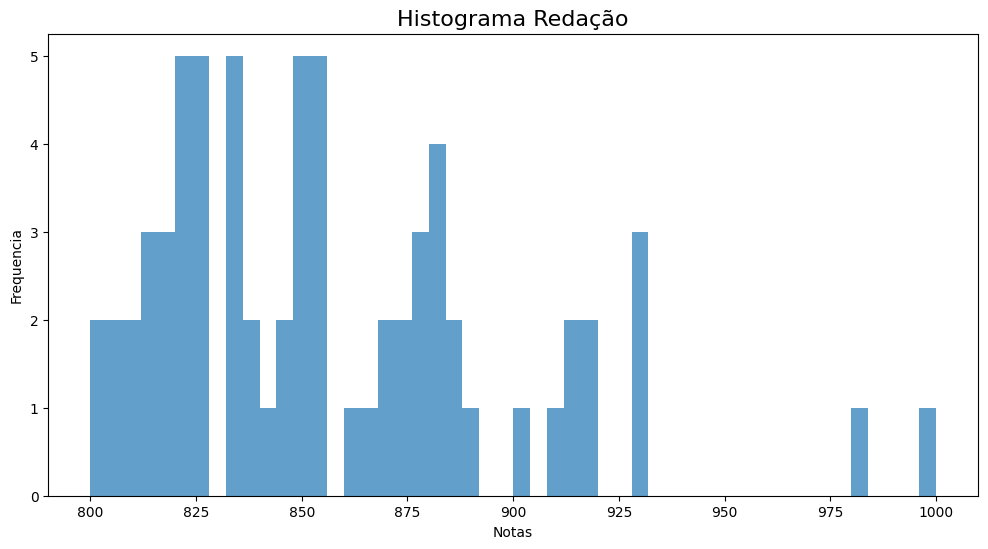

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df_ponderado_org['Redação'], bins=50, range=[800,1000], alpha=0.7)
plt.title('Histograma Redação', fontsize=16)
plt.xlabel('Notas', fontsize=10)
plt.ylabel('Frequencia', fontsize=10)
plt.show()

#O histograma não é simétrico. Ele é multimodal.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma
opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

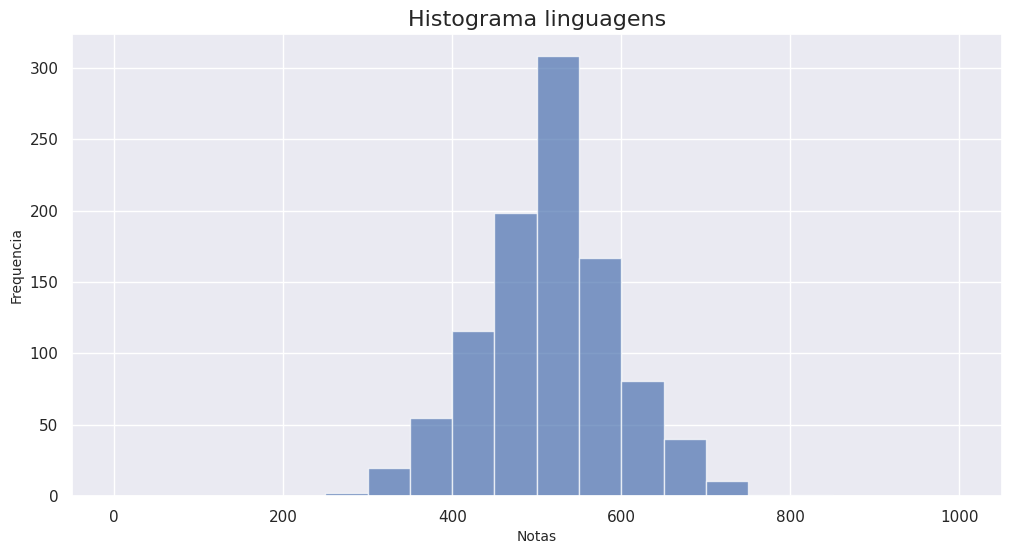

In [ ]:
plt.figure(figsize=(12,6))
plt.hist(df_ponderado_org['Linguagens'], bins= 20, range=[0, 1000], alpha=0.7)
plt.title('Histograma linguagens', fontsize=16)
plt.xlabel('Notas', fontsize=10)
plt.ylabel('Frequencia', fontsize=10)
plt.show()

#O histograma é simétrico.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da
natureza e redação. É possível enxergar outliers? Utilize o método IQR.


In [ ]:
def analise_outlier (df_ponderado_org, column):
  q1 = df_ponderado_org[column].quantile(0,25)
  q3 = df_ponderado_org[column].quantile(0,75)
  iqr = q3 -q1
  lower = q1 - 1.5 *iqr
  upper = q3 + 1.5 * iqr

  outlier = []
  nan = []


  for values in df_ponderado_org[column].values:
    if ((value < lower) or (value > upper)):
        nan.append(np.nan)
        print("Outlier detectado: ", value)
    else:
      outlier.append(value)
      print(f"Coluna: {column} o número de outlier encontrado foi: ", len(outlier))

9. Remova todos os outliers e verifique se eles são passíveis de alterar a
média nacional significativamente? (considere significativamente um
valor acima de 5%)

In [ ]:
import pandas as pd
from scipy import stats


In [ ]:
df_ponderado_org
threshold = 0.05
z_scores = stats.zscore(df_ponderado_org)
outliers = (z_scores > threshold).any(axis=1)
df_no_outliers = df_ponderado_org[outliers]

print(df_no_outliers)

In [ ]:
sem_outlier = df_ponderado_org[(z_scores.abs() <= threshold).all(axis=1)]
sem_outlier

10. Considerando valores nulos, tente encontrar qual seria a melhor medida
de tendência que pode substituir as notas nulas. Média, moda ou
mediana? Substitua o valor por todos os três e diga qual delas altera
menos a média geral e o desvio padrão.

In [ ]:
#tratamento dos dados, retirando os valores nulos e substituindo pela mediana
j= dataframe.median()

df_tratado_mediana = dataframe.fillna(j)
df_tratado_mediana.median()


<ipython-input-28-186405a657ad>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  j= dataframe.median()
<ipython-input-28-186405a657ad>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tratado_mediana.median()


Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

In [ ]:
#tratamento dos dados, retirando os valores nulos e substituindo pela mediana
a = dataframe.mean()
df_tratad_media = dataframe.fillna(a)
df_tratad_media.mean()



<ipython-input-29-54c7b93d0337>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  a = dataframe.mean()
<ipython-input-29-54c7b93d0337>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_tratad_media.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [ ]:
#tratamento dos dados, retirando os valores nulos e substituindo pela mediana
b = dataframe.mode()
df_tratad_moda = dataframe.fillna(b)
df_tratad_moda.mode()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,287.0,289.9,314.4,319.8,398.992589,Homem
1,NaN,NaN,NaN,NaN,411.000919,NaN
2,NaN,NaN,NaN,NaN,457.172738,NaN
3,NaN,NaN,NaN,NaN,459.122741,NaN
4,NaN,NaN,NaN,NaN,459.185747,NaN
5,NaN,NaN,NaN,NaN,481.469837,NaN
6,NaN,NaN,NaN,NaN,496.729486,NaN
7,NaN,NaN,NaN,NaN,499.287488,NaN
8,NaN,NaN,NaN,NaN,501.020719,NaN
9,NaN,NaN,NaN,NaN,508.697052,NaN
